---

1. MCP技术体系介绍

  1.1 Function calling 技术回顾

  我们知道，能调用外部工具，是大模型进化为智能体Agent的关键，如果不能使用外部工具，大模型就只能是个简单的聊天机器人，甚至连查询天气都做不到。由于底层技术限制啊，大模型本身是无法和外部工具直接通信的，因此Function calling的思路，就是创建一个外部函数（function）作为中介，一边传递大模型的请求，另一边调用外部工具，最终让大模型能够间接的调用外部工具。

  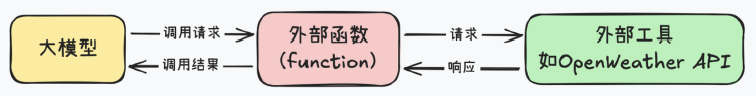

  例如，当我们要查询当前天气时，让大模型调用外部工具的function calling的过程就如图所示：

  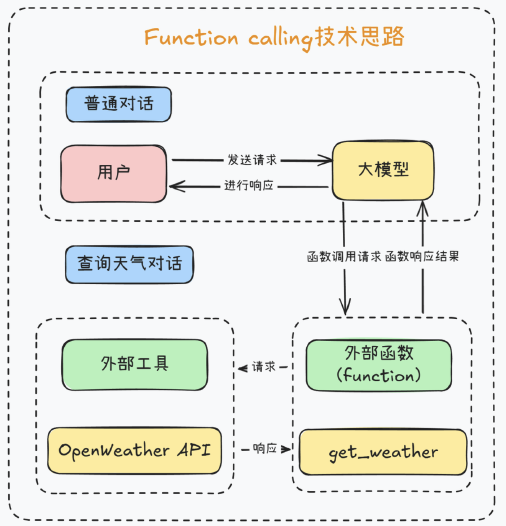
  

毫无疑问，Function calling的诞生意义重大，这项技术目前也成为大模型调用外部工具的基本技术范式，哪怕是MCP盛行的今天，底层仍然是Function calling执行流程。


Function calling是个非常不错的技术设计，自诞生以来，一直被业内奉为圭臬。但唯一的问题就是，编写这个外部函数的工作量太大了，一个简单的外部函数往往就得上百行代码，而且，为了让大模型“认识”这些外部函数，我们还要额外为每个外部函数编写一个JSON Schema格式的功能说明，此外，我们还需要精心设计一个提示词模版，才能提高Function calling响应的准确率。

1.2 MCP技术本质：Function calling的更高层实现

而近一段时间大火的MCP技术，其实就可以将其理解为Function calling技术的更高层封装和实现。传统的Function calling技术要求围绕不同的外部工具API单独创建一个外部函数，类似一把锁单独配一把钥匙，而一个智能体又往往涉及到多个外部工具设计，因此开发工作量很大。

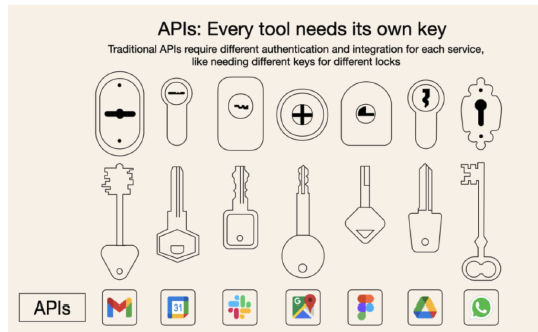






而MCP技术，全称为Model Context Protocol，模型上下文协议，是一种开发者共同遵守的协议，在这个协议框架下，大家围绕某个API开发的外部工具就能够共用，从而大幅减少重复造轮子的时间。

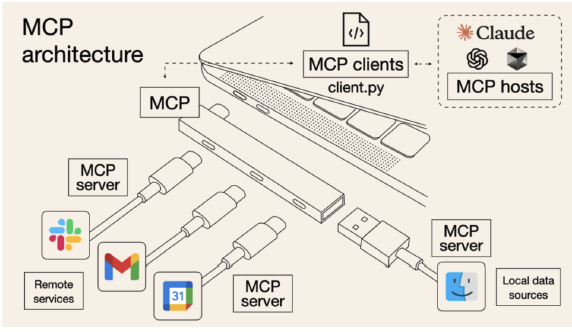


1.3 MCP 技术概念介绍

(1) MCP服务器（server）与客户端（client）概念介绍

不同于Function calling技术，MCP技术是对于大模型和外部工具的另一种划分方式，也就是说在MCP技术体系中，此时MCP会将外部工具运行脚本称作服务器，而接入这些外部工具的大模型运行环境称作客户端。

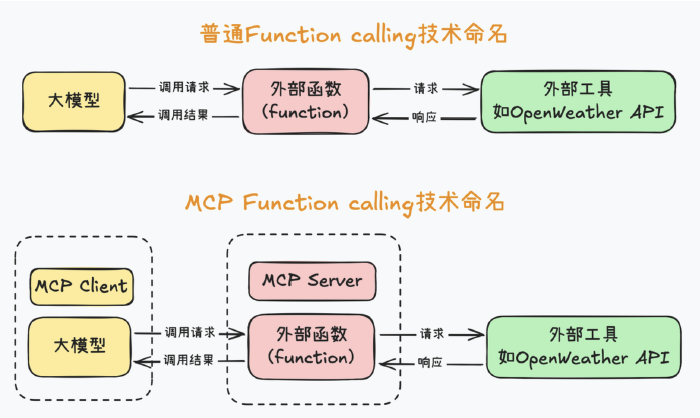

一个客户端可以接入多个不同类型的服务器的，但要求是都可以遵循MCP通信协议。简单理解就是MCP服务器的输出内容是一种标准格式的内容，只能被MCP客户端所识别。在客户端和服务器都遵循MCP协议的时候，客户端就能够像Function calling中大模型调用外部工具一样，调用MCP服务器里面的工具。

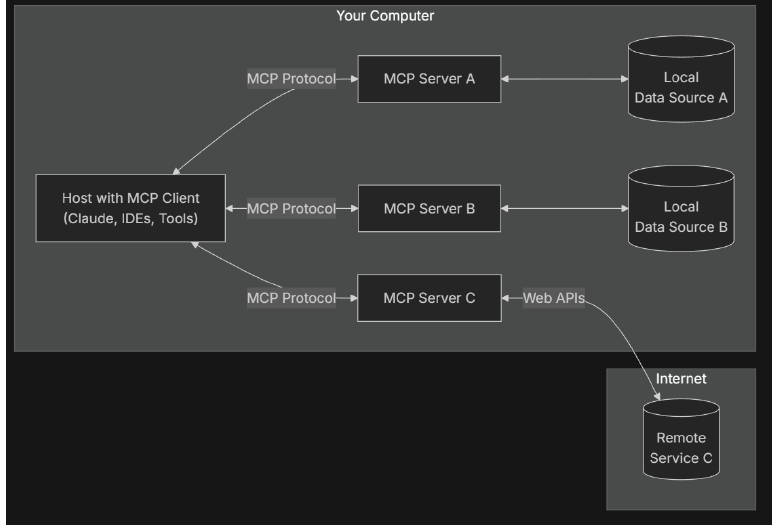


(2) MCP服务器集合

暂时抛开底层原理不谈，在MCP技术爆发的这几个月，市面上已经诞生了成百上千的MCP服务器，甚至还出现了大量的MCP服务器集合网站：

*   MCP官方服务器合集：https://github.com/modelcontextprotocol/servers
*   MCP Github热门导航：https://github.com/punkpeye/awesome-mcp-servers
*   Smithery：https://smithery.ai/
*   MCP导航：：https://mcp.so/

在实际进行智能体开发过程中，我们可以参考这些网站上的MCP工具，并有选择的对其进行调用。但需要注意的是，无论这些网站的组织形式多么花样百出，但实际上当我们本地调用MCP工具的时候，都是通过uvx或者npx将对应的库下载到本地，然后再进行运行。


2. MCP客户端Client开发流程

 2.1 uv工具入门使用指南

（1） uv入门使用指南

MCP开发要求借助uv进行虚拟环境创建和依赖管理。uv 是一个Python 依赖管理工具，类似于pip 和 conda ，但它更快、更高效，并且可以更好地管理 Python 虚拟环境和依赖项。它的核心目标是替代 pip 、venv 和 pip-tools ，提供更好的性能和更低的管理开销。

uv 的**特点**：

*   速度更快：相比 pip ， uv 采用 Rust 编写，性能更优。
*   支持PEP 582：无需virtualenv，可以直接使用__pypackages__进行管理。
*   兼容pip ：支持requirements.txt和pyproject.toml依赖管理。
*   替代venv ：提供uv venv进行虚拟环境管理，比venv更轻量。
*   跨平台：支持 Windows、macOS 和 Linux。

(2) uv安装流程

方法1： 使用pip安装（适用于已安装pip的系统）

In [ ]:
!pip install uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 90.3 MB/s eta 0:00:00


方法 2：使用 curl 直接安装

如果你的系统没有 pip ，可以直接运行：

In [ ]:
curl -LsSf https://astral.sh/uv/install.sh | sh

这会自动下载 uv 并安装到 /usr/local/bin。

(3) uv的基本用法介绍

安装uv后，你可以像pip一样使用它，但它的语法更简洁，速度也更快。注意，以下为使用语法示例，不用实际运行。

**安装python依赖**

In [ ]:
!uv pip install requests

Using Python 3.11.13 environment at: /usr
Audited 1 package in 105ms


**创建虚拟环境**

In [ ]:
!uv venv myenv

Using CPython 3.11.13 interpreter at: /usr/bin/python3
Creating virtual environment at: myenv
Activate with: source myenv/bin/activate


**激活虚拟环境**

In [ ]:
!source myenv/bin/activate # Linux/macOS

**安装 requirements.txt**

在content/myenv新建requirements.txt

numpy==1.25.0
pandas==2.1.0
torch==2.0.1


In [ ]:
!uv pip install -r requirements.txt

流式输出内容被截断，只能显示最后 5000 行内容。
⠹ Preparing packages... (3/16)
nvidia-cuda-cupti-cu11   ------------------------------ 8.99 MiB/11.30 MiB
pandas                   ------------------------------ 3.21 MiB/12.05 MiB
numpy                    ------------------------------ 9.32 MiB/16.79 MiB
nvidia-cuda-nvrtc-cu11   ------------------------------ 9.72 MiB/20.04 MiB
nvidia-curand-cu11       ------------------------------ 10.02 MiB/52.10 MiB
triton                   ------------------------------ 10.03 MiB/60.35 MiB
nvidia-cusolver-cu11     ------------------------------ 9.36 MiB/97.84 MiB
nvidia-cufft-cu11        ------------------------------ 9.72 MiB/160.60 MiB
nvidia-cusparse-cu11     ------------------------------ 9.79 MiB/165.16 MiB
nvidia-nccl-cu11         ------------------------------ 9.85 MiB/168.90 MiB
nvidia-cublas-cu11       ------------------------------ 9.81 MiB/302.41 MiB
nvidia-cudnn-cu11        ------------------------------ 9.75 MiB/531.33 MiB
⠹ Preparing packages... (3/16)
nvid

**直接运行python项目**

如果项目种包含pyproject.toml,你可以直接运行：

In [ ]:
!uv run python script.py

/usr/bin/python3: can't open file '/content/script.py': [Errno 2] No such file or directory


但uv速度更快，管理更高效。

为什么MCP更推荐使用uv进行环境管理？
MCP依赖的Python环境可能包含多个模块， uv通过pyproject.toml提供更高效的管理方式，并且可以避免pip的一些依赖冲突问题。此外， uv的包管理速度远超pip ，这对于MCP这样频繁管理依赖的项目来说是一个很大的优势。

接下来我们尝试先构建一个 MCP 客户端，确保基本逻辑可用，然后再逐步搭建 MCP 服务器进行联调，这样可以分阶段排查问题，避免一上来就涉及太多复杂性。

2.2 MCP极简客户端搭建流程

（1） 创建MCP客户端项目

In [ ]:
#创建项目目录
!uv init mcp-client

Initialized project `mcp-client` at `/content/mcp-client`


In [ ]:
%cd mcp-client

/content/mcp-client


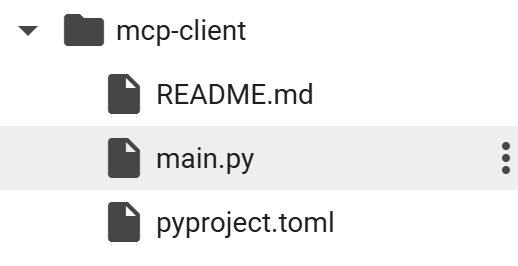

（2） 创建MCP客户端虚拟环境

In [ ]:
# 创建虚拟环境
!uv venv

# 激活虚拟环境
!source .venv/bin/activate

Using CPython 3.11.13 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate


这里需要注意的是，相比pip，uv会自动识别当前项目主目录并创建虚拟环境。
然后即可通过add方法在虚拟环境中安装相关的库。

In [ ]:
# 安装 MCP SDK
!uv add mcp

Resolved 29 packages in 635ms
⠙ Preparing packages... (0/26)
⠙ Preparing packages... (0/26)
⠙ Preparing packages... (0/26)
python-multipart     ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
python-multipart          ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
python-multipart          ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
jsonschema-specifications ------------------------------     0 B/18.00 KiB
python-multipart          ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
jsonschema-specifications ------------------------------     0 B/18.00 KiB
python-multipart          ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
jsonschema-specifications ------------------------------     0 B/18.00 KiB
python-multipart          ------------------------------     0 B/23.97 KiB
⠙ Preparing packages... (0/26)
jsonschema-specificat

（3） 编写基础MCP客户端

然后在当前项目主目录中创建client.py

并写入以下代码

In [ ]:
import asyncio
from mcp import ClientSession
from contextlib import AsyncExitStack

class MCPClient:
  def __init__(self):
     """初始化 MCP 客户端"""
     self.session = None
     self.exit_stack = AsyncExitStack()

  async def connect_to_mock_server(self):
     """模拟 MCP 服务器的连接（暂不连接真实服务器）"""
     print("✅ MCP 客户端已初始化，但未连接到服务器")


  async def chat_loop(self):
     """运行交互式聊天循环"""
     print("\nMCP 客户端已启动！输入 'quit' 退出")

     while True:
       try:
         query = input("\nQuery: ").strip()
         if query.lower() == 'quit':
           break
         print(f"\n🤖 [Mock Response] 你说的是：{query}")
       except Exception as e:
         print(f"\n⚠️ 发生错误: {str(e)}")

  async def cleanup(self):
     """清理资源"""
     await self.exit_stack.aclose()

async def main():
  client = MCPClient()
  try:
     await client.connect_to_mock_server()
     await client.chat_loop()
  finally:
     await client.cleanup()


if __name__ == "__main__":
  asyncio.run(main())


这段代码能够初始化MCP客户端（但不连接服务器），并提供一个交互式CLI，可以输入查询（但只返回模拟回复），通过输入quit退出程序。需要注意的是，此时客户端没有关联任何大模型，因此只会重复用户的输入。

（4） MCP客户端基本代码结构

以下是client.py 代码详解，代码核心功能：

*   初始化MCP客户端
*   *提供一个命令行交互界面
*   模拟 MCP 服务器连接
*   支持用户输入查询并返回「模拟回复」
*   支持安全退出

代码具体解释如下：首先是导入必要的库

In [ ]:
import asyncio # 让代码支持异步操作
from mcp import ClientSession # MCP 客户端会话管理
from contextlib import AsyncExitStack # 资源管理（确保客户端关闭时释放资源）

📌**解释：**

*   asyncio ：Python 内置的异步编程库，让 MCP 可以非阻塞地执行任务（比如聊天、查询）。
*   mcp.ClientSession ：用于管理 MCP 客户端会话（但目前我们先不连接 MCP 服务器）。
*   AsyncExitStack ：自动管理资源，确保程序退出时正确关闭 MCP 连接。


然后创建 MCPClient 类



In [ ]:
class MCPClient:
  def __init__(self):
    """初始化 MCP 客户端"""
    self.session = None # 先不连接 MCP 服务器
    self.exit_stack = AsyncExitStack() # 创建资源管理器

📌**解释：**

*   self.session = None ：暂时不连接 MCP 服务器，后续可以修改来真正连接。
*   self.exit_stack = AsyncExitStack() ：管理 MCP 客户端的资源，确保程序退出时可以正确释放资源。

紧接着模拟MCP服务器连接

In [ ]:
async def connect_to_mock_server(self):
  """模拟 MCP 服务器的连接（暂不连接真实服务器）"""
  print("✅ MCP 客户端已初始化，但未连接到服务器")

📌 **解释：**

*   这个函数不会真的连接 MCP 服务器，只是打印一条信息，表示客户端已经初始化。
*   async def ：因为我们用的是 异步编程，所以需要用 async 关键字。

然后创建交互式聊天循环

In [ ]:
async def chat_loop(self):
     """运行交互式聊天循环"""
     print("\nMCP 客户端已启动！输入 'quit' 退出")

     while True:
       try:
         query = input("\nQuery: ").strip()
         if query.lower() == 'quit':
           break
         print(f"\n🤖 [Mock Response] 你说的是：{query}")
       except Exception as e:
         print(f"\n⚠️ 发生错误: {str(e)}")

📌 **解释：**

*   while True ：无限循环，让用户可以不断输入查询。
*   query = input("\nQuery: ").strip() ：获取用户输入的查询。
*   if query.lower() == 'quit' ：如果用户输入 quit ，退出循环。
*   print(f"\n🤖 [Mock Response] 你说的是：{query}") ：模拟 MCP 服务器的响应，暂时只是回
显用户输入的内容。

**最后释放资源代码**

In [ ]:
async def cleanup(self):
     """清理资源"""
     await self.exit_stack.aclose()

📌 **解释：**

*   aclose() 确保程序退出时正确关闭 MCP 连接（尽管目前没有真正的连接）。

并定义main() 主函数

In [ ]:
async def main():
  client = MCPClient()
  try:
     await client.connect_to_mock_server()
     await client.chat_loop()
  finally:
     await client.cleanup()

📌 **解释：**

*   client = MCPClient() ：创建一个 MCP 客户端实例。
*   await client.connect_to_mock_server() ：初始化 MCP 客户端（暂不连接服务器）。
*   await client.chat_loop() ：启动交互式聊天。
*   finally: 确保 不管程序是否异常退出，都会正确释放资源。

以及运行代码


In [ ]:
if __name__ == "__main__":
  asyncio.run(main())

📌 **解释：**

*   if __name__ == "__main__": ：确保代码只能在 Python 直接运行时执行（而不是作为库导入时）。
*   asyncio.run(main()) ：启动 main() ，运行 MCP 客户端。

MCP中一个基础的客户端代码结构总结如下：

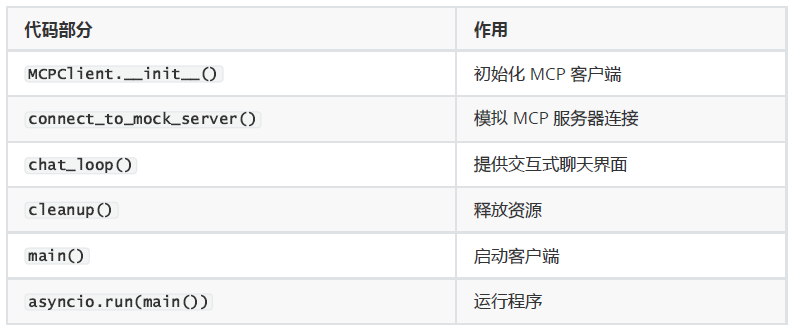


（5） 运行MCP客户端

然后尝试运行这个极简的MCP客户端：

In [ ]:
!uv run client.py

✅ MCP 客户端已初始化，但未连接到服务器

MCP 客户端已启动！输入 'quit' 退出

Query: 你好

🤖 [Mock Response] 你说的是：你好

Query: quit


3. MCP客户端接入Qianwen在线模型流程

接下来尝试在客户端中接入OpenAI、DeepSeek和通义Qianwen等在线模型进行对话。

(1) 新增依赖

为了支持调用大模型，以及在环境变量中读取API-key等信息，需要先安装如下依赖包

In [ ]:
!uv add mcp openai python-dotenv

Resolved 33 packages in 178ms
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
⠙ Preparing packages... (0/4)
distro               ------------------------------     0 B/19.80 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
tqdm                 ------------------------------     0 B/76.70 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
tqdm                 ------------------------------     0 B/76.70 KiB
⠙ Preparing packages... (0/4)
distro               ------------------------------ 14.92 KiB/19.80 KiB
tqdm                 ------------------------------ 14.92 

(2) 创建.env文件

接下来创建.env文件，并写入Qianwen的API-Key，以及反向代理地址。借助反向代理，国内可以无门槛直连OpenAI官方服务器，并调用官方API。

In [ ]:
# 创建 .env 文件
!echo "OPENAI_API_KEY=sk-XXXXX(自己的API-KEY)" > /content/mcp-client/.env
!echo "BASE_URL=https://dashscope.aliyuncs.com/compatible-mode/v1" >> /content/mcp-client/.env
!echo "MODEL=qwen-plus" >> /content/mcp-client/.env

In [ ]:
!cat /content/mcp-client/.env

(3) 修改client.py代码

接下来修改客户端代码：



In [ ]:
import asyncio
import os
from openai import OpenAI
from dotenv import load_dotenv
from contextlib import AsyncExitStack

# 加载 .env 文件，确保 API Key 受到保护
load_dotenv()

class MCPClient:
  def __init__(self):
     """初始化 MCP 客户端"""
     self.exit_stack = AsyncExitStack()
     self.openai_api_key = os.getenv("OPENAI_API_KEY") # 读取 OpenAI API Key
     self.base_url = os.getenv("BASE_URL") # 读取 BASE YRL
     self.model = os.getenv("MODEL") # 读取 model
     if not self.openai_api_key:
       raise ValueError("❌ 未找到 OpenAI API Key，请在 .env 文件中设置OPENAI_API_KEY")
     self.client = OpenAI(api_key=self.openai_api_key, base_url=self.base_url)

  async def process_query(self, query: str) -> str:
     """调用 OpenAI API 处理用户查询"""
     messages = [{"role": "system", "content": "你是一个智能助手，帮助用户回答问题。"},
            {"role": "user", "content": query}]
     try:
       # 调用 OpenAI API
       response = await asyncio.get_event_loop().run_in_executor(
         None,
         lambda: self.client.chat.completions.create(
         model=self.model,
         messages=messages)
        )
       return response.choices[0].message.content
     except Exception as e:
       return f"⚠️ 调用 OpenAI API 时出错: {str(e)}"

  async def chat_loop(self):
     """运行交互式聊天循环"""
     print("\nMCP 客户端已启动！输入 'quit' 退出")

     while True:
       try:
         query = input("\n你: ").strip()
         if query.lower() == 'quit':
           break
         response = await self.process_query(query) # 发送用户输入到 OpenAI API
         print(f"\n🤖 OpenAI: {response}")
       except Exception as e:
         print(f"\n⚠️ 发生错误: {str(e)}")

  async def cleanup(self):
     """清理资源"""
     await self.exit_stack.aclose()

async def main():
  client = MCPClient()
  try:
     await client.chat_loop()
  finally:
     await client.cleanup()


if __name__ == "__main__":
  asyncio.run(main())


（4） 运行client.py

In [ ]:
!uv run client.py


MCP 客户端已启动！输入 'quit' 退出

你: 你好，请做一下自我介绍

🤖 OpenAI: 你好！我是Qwen，是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我能够帮助你回答问题、创作文字，比如写故事、写公文、写邮件、写剧本、逻辑推理、编程等等，还能表达观点，玩游戏等。如果你有任何问题或需要帮助，欢迎随时告诉我！

你: quit


(5) clint.py代码解释

加载OpenAI API Key

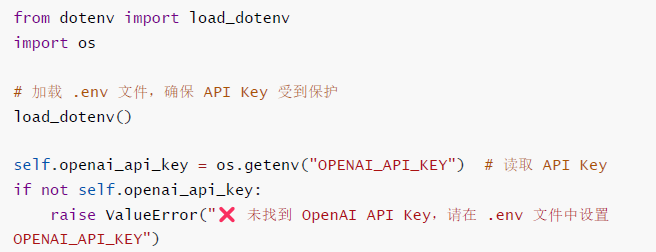

📌 **解释**

*   load_dotenv() ：自动加载 .env 文件，避免在代码中直接暴露 API Key。
*   os.getenv("OPENAI_API_KEY") ：从环境变量中读取 OPENAI_API_KEY 。
*   raise ValueError(...) ：如果 API Key 为空，则抛出错误，提醒用户必须配置 API Key。

📌 **创建 .env 文件（如果还没有的话）**

touch .env

📌 **在 .env 文件中添加 API Key**

OPENAI_API_KEY=你的OpenAI API Key

发送用户输入到 OpenAI API

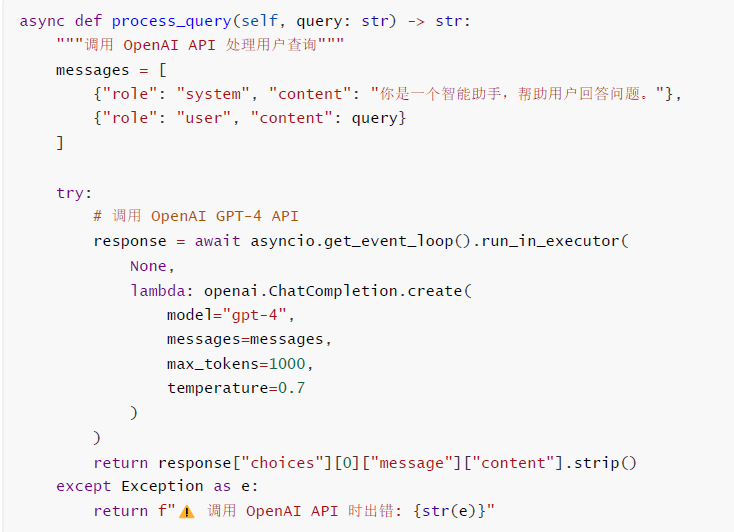

📌 **解释**

*   messages ：创建对话上下文，让 OpenAI 知道如何回答问题：
    system 角色：设定 AI 角色（如“你是一个智能助手”）。
    user 角色：存储用户输入。
*   openai.ChatCompletion.create(...)
    model="gpt-4" ：使用 OpenAI 的 GPT-4 进行对话。
    messages=messages ：提供聊天记录，让 AI 生成回答。
    max_tokens=1000 ：限制 AI 生成的最大字数。
    temperature=0.7 ：控制 AI 回答的随机性（越高越随机）。
*   run_in_executor(...) ：
    因为 OpenAI API 是同步的，但我们用的是异步代码
    这里用 asyncio.get_event_loop().run_in_executor(...) 将 OpenAI API 变成异步任务，防止程序卡顿。

**交互式聊天**

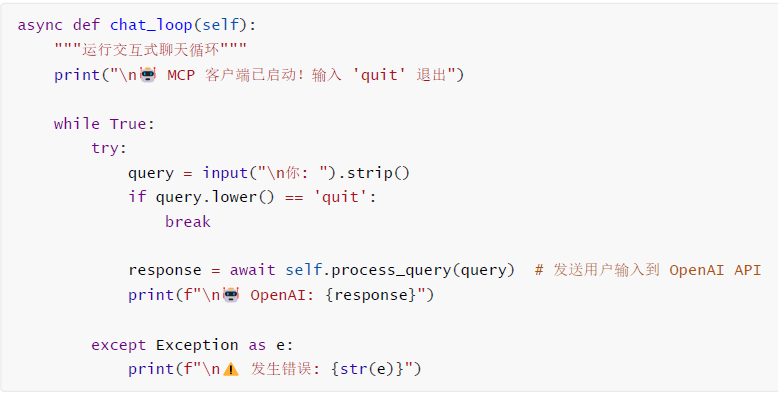

📌 解释

*   输入查询 query = input("\n你: ").strip() ，支持多轮对话。
*   调用 process_query() ，将用户输入发送到 OpenAI API 并获取回复。
*   显示 OpenAI 生成的回复： print(f"\n🤖 OpenAI: {response}")
*   用户输入 quit 退出。

需要注意的是，由于MCP的client SDK主要规定了client和server之间的通信方法，因此在没有创建server之前，一个单纯对话的client甚至不需要用到mcp功能。但本段代码的学习仍是有必要的，为了熟悉各类大模型本地调用对话流程。而后我们只需要围绕上述代码稍作修改，即可调用外部的server。


4. MCP天气查询服务器server与使用

4.1 MCP服务器概念介绍

根据MCP协议定义，Server可以提供三种类型的标准能力，Resources、Tools、Prompts，每个Server可同时提供者三种类型能力或其中一种。

*   Resources：资源，类似于文件数据读取，可以是文件资源或是API响应返回的内容。
*   Tools：工具，第三方服务、功能函数，通过此可控制LLM可调用哪些函数。
*   Prompts：提示词，为用户预先定义好的完成特定任务的模板。

4.2 MCP服务器通讯机制

Model Context Protocol（MCP）是一种由 Anthropic 开源的协议，旨在将大型语言模型直接连接至数据源，实现无缝集成。根据 MCP 的规范，当前支持两种传输方式：标准输入输出（stdio）和基于HTTP 的服务器推送事件（SSE）。而近期，开发者在 MCP 的 GitHub 仓库中提交了一项提案，建议采用“可流式传输的 HTTP”来替代现有的HTTP+SSE方案。此举旨在解决当前远程MCP传输方式的关键限制，同时保留其优势。 HTTP和SSE（服务器推送事件）在数据传输方式上存在明显区别：

*   通信方式：
   *   **HTTP**：采用请求-响应模式，客户端发送请求，服务器返回响应，每次请求都是独立的。
   *   **SSE**：允许服务器通过单个持久的 HTTP 连接，持续向客户端推送数据，实现实时更新。

*   连接特性：

   *   **HTTP**：每次请求通常建立新的连接，虽然在 HTTP/1.1 中引入了持久连接，但默认情况下仍是短连接。
   *   **SSE**：基于长连接，客户端与服务器之间保持持续的连接，服务器可以在任意时间推送数据。

*   适用场景：
   *   **HTTP**：适用于传统的请求-响应场景，如网页加载、表单提交等。
   *   **SSE**：适用于需要服务器主动向客户端推送数据的场景，如实时通知、股票行情更新等。

需要注意的是，SSE仅支持服务器向客户端的单向通信，而WebSocket则支持双向通信。

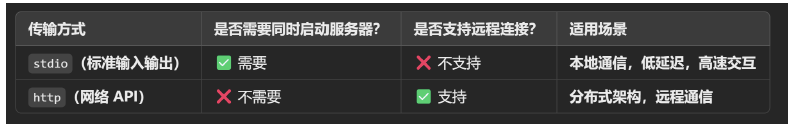



在 Model Context Protocol（MCP）中，标准输入输出（stdio）模式是一种用于本地通信的传输方式。在这种模式下，MCP 客户端会将服务器程序作为子进程启动，双方通过标准输入（stdin）和标准输出（stdout）进行数据交换。这种方式适用于客户端和服务器在同一台机器上运行的场景，确保了高效、低延迟的通信。

具体而言，客户端通过标准输入发送请求，服务器通过标准输出返回响应。这种直接的数据传输方式减少了网络延迟和传输开销，适合需要快速响应的本地应用。

相比之下，MCP 还支持基于 HTTP 和服务器推送事件（SSE）的传输方式，适用于客户端和服务器位于不同物理位置的场景。在这种模式下，客户端和服务器通过 HTTP 协议进行通信，利用 SSE 实现服务器向客户端的实时数据推送。

总的来说，stdio 模式提供了一种简单、高效的本地通信方式，适用于客户端和服务器在同一环境下运行的情况。而对于分布式或远程部署的场景，基于 HTTP 和 SSE 的传输方式则更为合适。

可流式传输的 HTTP PR：https://github.com/modelcontextprotocol/specification/pull/206

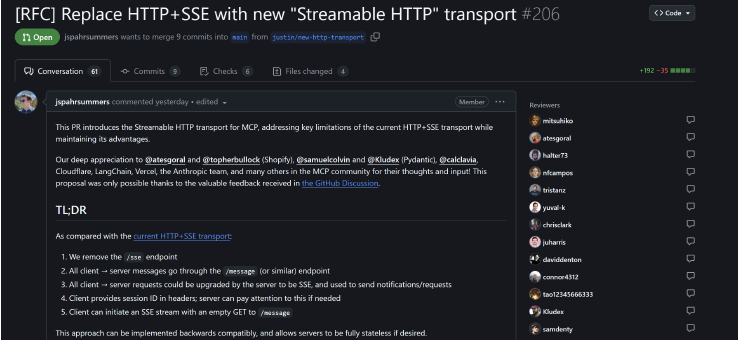

具体来说，MCP定义了Client与Server进行通讯的协议与消息格式，其支持两种类型通讯机制：标准输入输出通讯、基于SSE的HTTP通讯，分别对应着本地与远程通讯。Client与Server间使用JSON-RPC 2.0格式进行消息传输。

*   本地通讯：使用了stdio传输数据，具体流程Client启动Server程序作为子进程，其消息通讯是通过stdin/stdout进行的，消息格式为JSON-RPC 2.0。
*   远程通讯：Client与Server可以部署在任何地方，Client使用SSE与Server进行通讯，消息的格式为JSON-RPC 2.0，Server定义了/see与/messages接口用于推送与接收数据。


这里我们尝试一个入门级的示例，那就是创建一个天气查询的服务器。通过使用OpenWeather API，创建一个能够实时查询天气的服务器（server），并使用stdio方式进行通信。

4.3 天气查询服务器Server创建流程

（1） 服务器代码编写

接下来尝试创建服务器代码，此时MCP基本执行流程如下：

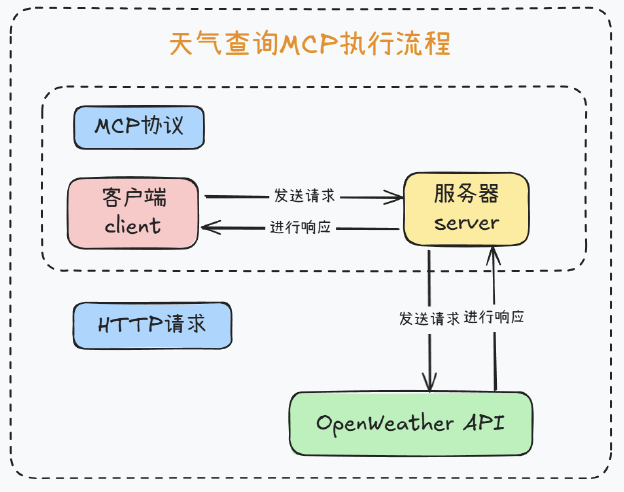


对应server服务器代码如下：

In [ ]:
import json
import httpx
from typing import Any
from mcp.server.fastmcp import FastMCP
# 初始化 MCP 服务器
mcp = FastMCP("WeatherServer")
# OpenWeather API 配置
OPENWEATHER_API_BASE = "https://api.openweathermap.org/data/2.5/weather"
API_KEY = "XXXXX(自己的API-KEY)" # 请替换为你自己的 OpenWeather API Key
USER_AGENT = "weather-app/1.0"

async def fetch_weather(city: str) -> dict[str, Any] | None:
  """
  从 OpenWeather API 获取天气信息。
  :param city: 城市名称（需使用英文，如 Beijing）
  :return: 天气数据字典；若出错返回包含 error 信息的字典
  """
  params = {
    "q": city,
    "appid": API_KEY,
    "units": "metric",
    "lang": "zh_cn"
  }
  headers = {"User-Agent": USER_AGENT}
  async with httpx.AsyncClient() as client:
    try:
      response = await client.get(OPENWEATHER_API_BASE, params=params,headers=headers, timeout=30.0)
      response.raise_for_status()
      return response.json() # 返回字典类型
    except httpx.HTTPStatusError as e:
      return {"error": f"HTTP 错误: {e.response.status_code}"}
    except Exception as e:
      return {"error": f"请求失败: {str(e)}"}

def format_weather(data: dict[str, Any] | str) -> str:
   """
   将天气数据格式化为易读文本。
   :param data: 天气数据（可以是字典或 JSON 字符串）
   :return: 格式化后的天气信息字符串
   """
   # 如果传入的是字符串，则先转换为字典
   if isinstance(data, str):
      try:
        data = json.loads(data)
      except Exception as e:
        return f"无法解析天气数据: {e}"
   # 如果数据中包含错误信息，直接返回错误提示
   if "error" in data:
      return f"⚠️ {data['error']}"

   # 提取数据时做容错处理
   city = data.get("name", "未知")
   country = data.get("sys", {}).get("country", "未知")
   temp = data.get("main", {}).get("temp", "N/A")
   humidity = data.get("main", {}).get("humidity", "N/A")
   wind_speed = data.get("wind", {}).get("speed", "N/A")
   # weather 可能为空列表，因此用 [0] 前先提供默认字典
   weather_list = data.get("weather", [{}])
   description = weather_list[0].get("description", "未知")

   return (
     f"🌍 {city}, {country}\n"
     f"🌡 温度: {temp}°C\n"
     f"💧 湿度: {humidity}%\n"
     f"🌬 风速: {wind_speed} m/s\n"
     f"🌤 天气: {description}\n"
   )

@mcp.tool()
async def query_weather(city: str) -> str:
  """
  输入指定城市的英文名称，返回今日天气查询结果。
  :param city: 城市名称（需使用英文）
  :return: 格式化后的天气信息
  """
  data = await fetch_weather(city)
  return format_weather(data)

if __name__ == "__main__":
  # 以标准 I/O 方式运行 MCP 服务器
  mcp.run(transport='stdio')


代码解释如下：

**Part 1. 异步获取天气数据**

*   函数 fetch_weather(city: str)

   *   使用 httpx.AsyncClient() 发送异步 GET 请求到 OpenWeather API。
   *   如果请求成功，则调用 response.json() 返回一个字典。
   *   出现异常时，返回包含错误信息的字典。

**Part 2. 格式化天气数据**

*   函数 format_weather(data: dict | str)

   *   首先检查传入的数据是否为字符串，如果是，则使用 json.loads 将其转换为字典。
   *   检查数据中是否包含 "error" 字段，如果有，直接返回错误提示。
   *   使用 .get() 方法提取 name 、sys.country 、main.temp 、main.humidity 、
wind.speed 和 weather[0].description 等数据，并为可能缺失的字段提供默认值。
   *   将提取的信息拼接成一个格式化字符串，方便阅读。



**Part 3. MCP 工具 query_weather(city: str)**

*   函数 query_weather

   *   通过 @mcp.tool() 装饰器注册为 MCP 服务器的工具，使其能够被客户端调用。
   *   调用 fetch_weather(city) 获取天气数据，然后用 format_weather(data) 将数据格式化为易读文本，最后返回该字符串。

**Part 4. 运行服务器**

*   if __name__ == "__main__":

   *   调用 mcp.run(transport='stdio') 启动 MCP 服务器，采用标准 I/O 通信方式，等待客户端调用。

此外，上述代码有两个注意事项，

*   query_weather函数的函数说明至关重要，相当于是此后客户端对函数进行识别的基本依据，因此需要谨慎编写；
*   当指定 transport='stdio' 运行 MCP 服务器时，客户端必须在启动时同时启动当前这个脚本，否则无法顺利通信。这是因为 stdio 模式是一种本地进程间通信（IPC，Inter-Process Communication）方式，它需要服务器作为子进程运行，并通过标准输入输出（stdin/stdout）进行数据交换。

因此，当我们编写完服务器后，并不能直接调用这个服务器，而是需要创建一个对应的能够进行stdio的客户端，才能顺利进行通信。


（2）天气查询客户端client创建流程

**代码编写：**

In [ ]:
import asyncio
import os
import json
from typing import Optional
from contextlib import AsyncExitStack
from openai import OpenAI
from dotenv import load_dotenv
from mcp import ClientSession, StdioServerParameters
from mcp.client.stdio import stdio_client


# 加载 .env 文件，确保 API Key 受到保护
load_dotenv()

class MCPClient:
  def __init__(self):
    """初始化 MCP 客户端"""
    self.exit_stack = AsyncExitStack()
    self.openai_api_key = os.getenv("OPENAI_API_KEY") # 读取 OpenAI API Key
    self.base_url = os.getenv("BASE_URL") # 读取 BASE YRL
    self.model = os.getenv("MODEL") # 读取 model
    if not self.openai_api_key:
      raise ValueError("❌ 未找到 OpenAI API Key，请在 .env 文件中设置OPENAI_API_KEY")
    self.client = OpenAI(api_key=self.openai_api_key, base_url=self.base_url)
    # 创建OpenAI client
    self.session: Optional[ClientSession] = None
    self.exit_stack = AsyncExitStack()

  async def connect_to_server(self, server_script_path: str):
    """连接到 MCP 服务器并列出可用工具"""
    is_python = server_script_path.endswith('.py')
    is_js = server_script_path.endswith('.js')
    if not (is_python or is_js):
      raise ValueError("服务器脚本必须是 .py 或 .js 文件")

    command = "python" if is_python else "node"
    server_params = StdioServerParameters(
      command=command,
      args=[server_script_path],
      env=None
    )
    # 启动 MCP 服务器并建立通信
    stdio_transport = await self.exit_stack.enter_async_context(stdio_client(server_params))
    self.stdio, self.write = stdio_transport
    self.session = await self.exit_stack.enter_async_context(ClientSession(self.stdio, self.write))
    await self.session.initialize()
    # 列出 MCP 服务器上的工具
    response = await self.session.list_tools()
    tools = response.tools
    print("\n已连接到服务器，支持以下工具:", [tool.name for tool in tools])

  async def process_query(self, query: str) -> str:
    """
    使用大模型处理查询并调用可用的 MCP 工具 (Function Calling)
    """
    messages = [{"role": "user", "content": query}]
    response = await self.session.list_tools()
    available_tools = [{
      "type": "function",
      "function": {
        "name": tool.name,
        "description": tool.description,
        "input_schema": tool.inputSchema
      }
    } for tool in response.tools]
    # print(available_tools)

    response = self.client.chat.completions.create(
      model=self.model,
      messages=messages,
      tools=available_tools
    )


    # 处理返回的内容
    content = response.choices[0]
    if content.finish_reason == "tool_calls":
      # 如何是需要使用工具，就解析工具
      tool_call = content.message.tool_calls[0]
      tool_name = tool_call.function.name
      tool_args = json.loads(tool_call.function.arguments)

      # 执行工具
      result = await self.session.call_tool(tool_name, tool_args)
      print(f"\n\n[Calling tool {tool_name} with args {tool_args}]\n\n")
      # 将模型返回的调用哪个工具数据和工具执行完成后的数据都存入messages中
      messages.append(content.message.model_dump())
      messages.append({
        "role": "tool",
        "content": result.content[0].text,
        "tool_call_id": tool_call.id,
      })
      # 将上面的结果再返回给大模型用于生产最终的结果
      response = self.client.chat.completions.create(
        model=self.model,
        messages=messages,
      )
      return response.choices[0].message.content
    return content.message.content

  async def chat_loop(self):
    """运行交互式聊天循环"""
    print("\n🤖 MCP 客户端已启动！输入 'quit' 退出")
    while True:
      try:
        query = input("\n你: ").strip()
        if query.lower() == 'quit':
          break
        response = await self.process_query(query) # 发送用户输入到 OpenAI API
        print(f"\n🤖 OpenAI: {response}")
      except Exception as e:
        print(f"\n⚠️ 发生错误: {str(e)}")


  async def cleanup(self):
    """清理资源"""
    await self.exit_stack.aclose()

async def main():
  if len(sys.argv) < 2:
    print("Usage: python client.py <path_to_server_script>")
    sys.exit(1)


  client = MCPClient()
  try:
    await client.connect_to_server(sys.argv[1])
    await client.chat_loop()
  finally:
    await client.cleanup()


if __name__ == "__main__":
  import sys
  asyncio.run(main())

**测试运行：**

In [ ]:
# 确认进入到项目目录
!cd /content/mcp-client
# 确认激活虚拟环境
!source .venv/bin/activate

In [ ]:
!uv run client.py server.py

Processing request of type ListToolsRequest

已连接到服务器，支持以下工具: ['query_weather']

🤖 MCP 客户端已启动！输入 'quit' 退出

你: 你好，请问北京的天气
Processing request of type ListToolsRequest
Processing request of type CallToolRequest
HTTP Request: GET https://api.openweathermap.org/data/2.5/weather?q=Beijing&appid=11e9adb827a70b8bbdee0f3e31270429&units=metric&lang=zh_cn "HTTP/1.1 200 OK"


[Calling tool query_weather with args {'city': 'Beijing'}]



🤖 OpenAI: 你好！北京现在的天气情况如下：

🌤 天气：多云  
🌡 温度：30.94°C  
💧 湿度：62%  
🌬 风速：2.96 m/s  

希望这些信息对你有帮助！如果需要进一步的天气预报，请告诉我。

你: quit


**代码解释：**

client代码整个MCP服务的核心，以下是这段代码的详细解释。

导入基本类

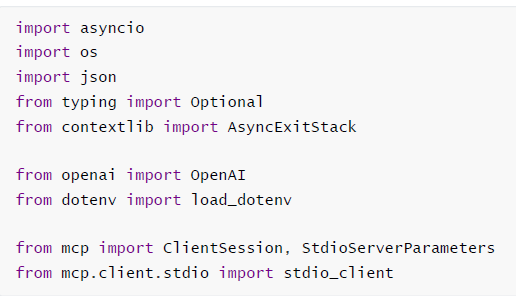


*   导入必要库

   *   asyncio ：支持异步编程
   *   os/json ：读取环境变量、解析 JSON
   *   typing.Optional ：类型提示
   *   contextlib.AsyncExitStack ：用于安全管理异步资源（如 MCP 连接）
   *   openai.OpenAI ：你的自定义 OpenAI Client 类
   *   dotenv.load_dotenv ：从 .env 文件加载环境变量（如 API Key）
   *   MCP 相关： mcp.ClientSession , mcp.client.stdio , StdioServerParameters

load_dotenv()

*   从 .env 文件中加载环境变量,

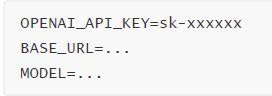





*   ** MCPClient 类创建过程**

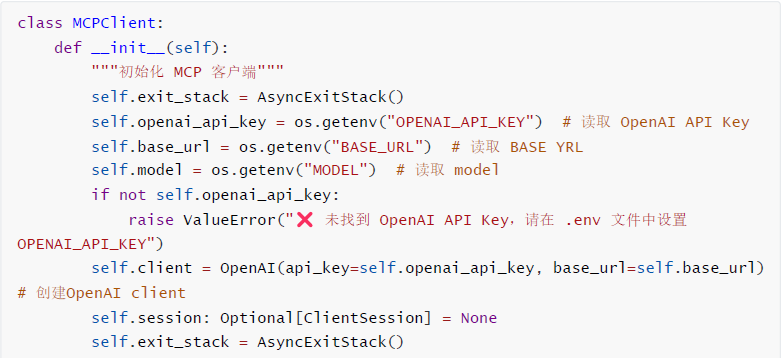



*   self.exit_stack = AsyncExitStack()
   *   用于统一管理异步上下文（如 MCP 连接）的生命周期。
   *   可以在退出（ cleanup ）时自动关闭。

*   读取环境变量

   *   openai_api_key ：OpenAI API Key
   *   base_url ：模型请求的 Base URL（如你自建的反代地址）
   *   model ：OpenAI 模型名称

*   初始化OpenAI客户端

   *   OpenAI(api_key=self.openai_api_key, base_url=self.base_url)
   *   你自定义的 OpenAI 客户端，用来与 OpenAI Chat Completion API 通信。

*   self.session
   *   用于保存MCP的客户端会话，默认是 None ，稍后通过 connect_to_server 进行连接。

*   再次声明 self.exit_stack = AsyncExitStack()
   *   这里两次赋值其实有点冗余（前面已赋值过一次）。不过并不影响功能，等同于覆盖掉前面的对象。可能是手误或调试时多写了一次。


connect_to_server(self, server_script_path: str)

*   负责启动并连接到MCP服务器，并列出可用工具。

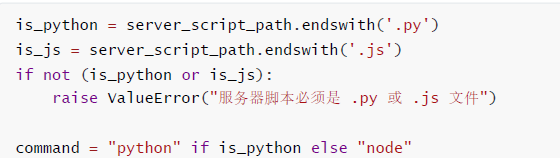


*   判断服务器脚本是 Python 还是 Node.js，选择对应的运行命令。

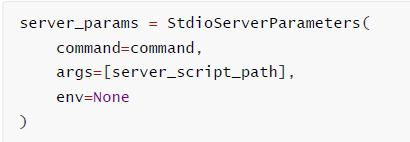



*   StdioServerParameters ：告诉 MCP 客户端如何启动服务器。
   *   command=command ：如 "python"
   *   args=[server_script_path] ：如 ["weather_server.py"]


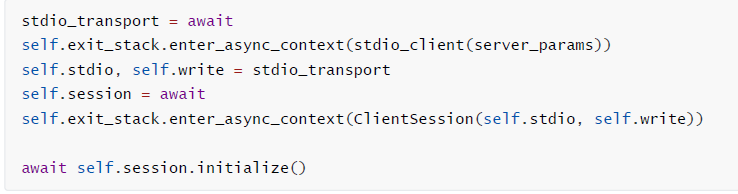

*   stdio_client(server_params) ：启动服务器进程，并建立 标准 I/O 通信管道。
*   self.stdio, self.write = stdio_transport ：拿到读写流。
*   ClientSession(...) ：创建 MCP 客户端会话，与服务器交互。
*   await self.session.initialize() ：发送初始化消息给服务器，等待服务器就绪。

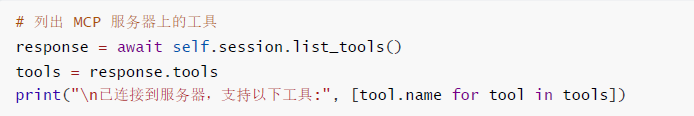


*   list_tools() ：向 MCP 服务器请求所有已注册的工具（用 @mcp.tool() 标记）。
*   打印工具列表，例如 ["get_forecast", "query_db", ...] 。

process_query(self, query: str) -> str

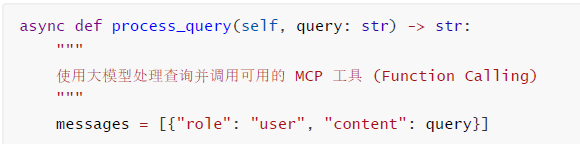


*   收到用户输入后，先把它组装进一个 messages 列表，目前只包含用户信息（ {"role": "user","content": query} ）。

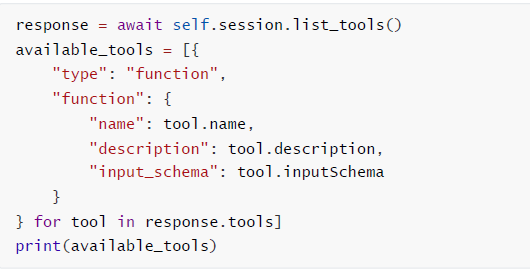



*   获取服务器上的工具，再转换成 available_tools 的格式。
*   这里你自定义了一个结构：每个工具对应一个 {"type": "function", "function": {...}} 的字典。
*   方便后面发给 OpenAI，告诉它：可以调用这些工具。

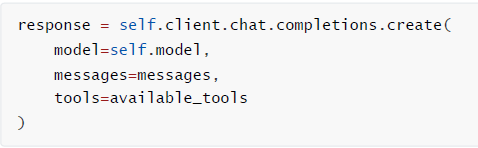




*   使用 OpenAI 客户端的

chat.completions.create


*   方法发送请求：

  *   model=self.model ：比如 "gpt-4o" 或 "deepseek-chat"
  *   messages=messages ：聊天上下文
  *   tools=available_tools ：让模型知道有哪些可调用的「函数」。这是你自定义的
“Function Calling”协议（非官方 JSON schema）。


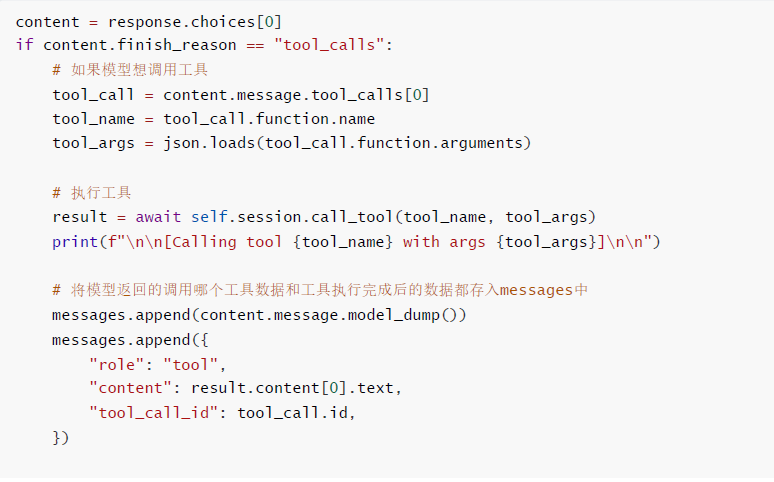


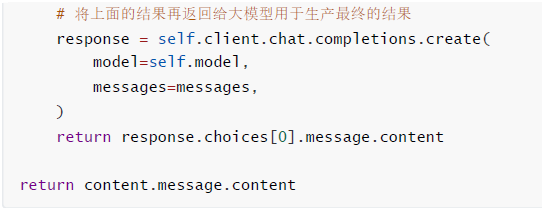

*   if content.finish_reason == "tool_calls":

  *   如果模型的输出表示「想调用工具」，它会在 content.message.tool_calls 列表中声明要用哪个函数、参数是什么。
  *   这是你自定义的一种函数调用机制，和官方 function_call 格式略有不同，但逻辑相似。

*   取出工具名 tool_name 和参数 tool_args ，再调用 self.session.call_tool(tool_name,tool_args) 执行 MCP 工具。
*   把工具调用结果以「role=tool」的形式写入 messages 。这样相当于把“函数调用结果”再喂给模型。
*   再次调用 OpenAI，让模型阅读到这个新上下文，产出最终回答。
*   如果没有要调用工具，直接返回 content.message.content （模型的文本回答）。


chat_loop(self)

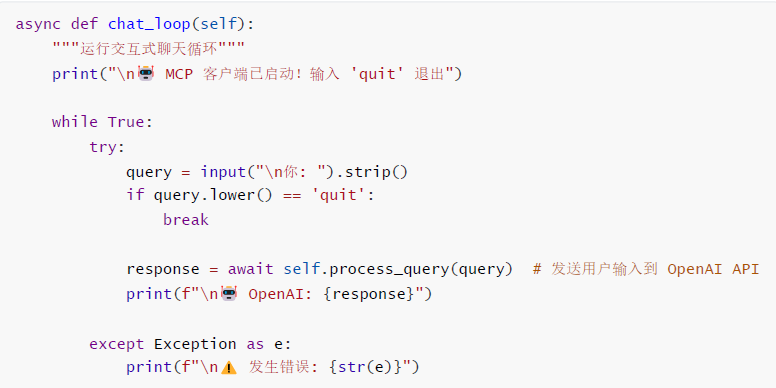



*   提供一个简单的 命令行界面，反复让用户输入问题。
*   每个问题交给 process_query ，把结果打印出来。
*   输入 'quit' 退出循环。

cleanup(self) 与 main()

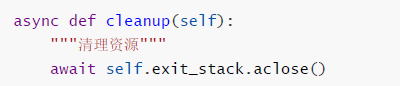


*   self.exit_stack.aclose() ：异步地关闭所有在 exit_stack 中注册的资源（包括 MCP 会话）。

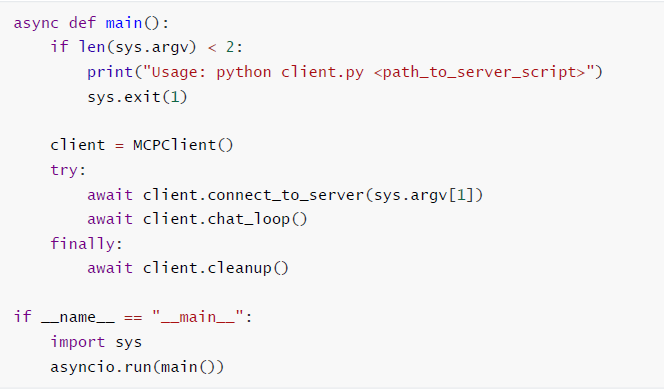



*   读取命令行参数，获取服务器脚本路径（如 weather_server.py ）。
*   创建 MCPClient 实例。
*   调用 connect_to_server ，启动并连接服务器。
*   进入 chat_loop 让用户输入多轮对话。
*   退出时调用 client.cleanup() 释放资源。

**代码总结如下：**

*   MCPClient 的主要职责：

  *   启动 MCP 服务器（通过 StdioServerParameters ）
  *   建立 MCP 会话，列出可用工具
  *   处理用户输入，将其发送给 OpenAI 模型
  *   如果模型想调用 MCP 工具（Function Calling），就执行 call_tool
  *   将结果重新发给模型，并返回最终回答

*   Function Calling 逻辑（你的自定义版）：
  *   tools=available_tools ：在 completions.create 时告诉模型有哪些工具可用。
  *   模型返回 finish_reason=="tool_calls" → 说明它想用工具。
  *   解析 tool_calls[0] ，执行 MCP 工具 → 再次发给模型 → 返回最终答案。

*   为什么要两次请求？
  *   第一次：模型根据你的指令，决定要不要用工具
  *   如果需要用工具 → 返回工具名称和参数 → 执行工具 → 把结果作为新的上下文发给模型
  *   第二次：模型基于工具结果给出最终回答

*   如何运行：
python client.py weather_server.py
  *   这会自动启动 weather_server.py （MCP 服务器）并进行 stdio 通讯。

*   可能需要的改进：
  *   多轮对话上下文：把所有消息都存进 messages ，让模型能记住以前的对话。
  *   错误处理：当工具调用失败时，给用户提示。




（5）MCP Inspector 功能介绍

在实际开发MCP服务器的过程中，Anthropic提供了一个非常便捷的debug工具：Inspector。借助Inspector，我们能够非常快捷的调用各类server，并测试其功能。Inspector具体功能实现流程如下。
*   安装nodejs

In [ ]:
!curl -fsSL https://deb.nodesource.com/setup_20.x | sudo bash -
!sudo apt install -y nodejs

2025-08-17 06:04:59 - Installing pre-requisites
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ub

In [ ]:
!npx -v

10.8.2


In [ ]:
!npx -y @modelcontextprotocol/inspector uv run server.py

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴Starting MCP inspector...
⚙️ Proxy server listening on 127.0.0.1:6277
🔑 Session token: 2c8b393f4abed896b4a794fbf9ead6b598513066348e87d17a7840600b97c9b0
Use this token to authenticate requests or set DANGEROUSLY_OMIT_AUTH=true to disable auth

🔗 Open inspector with token pre-filled:
   http://localhost:6274/?MCP_PROXY_AUTH_TOKEN=2c8b393f4abed896b4a794fbf9ead6b598513066348e87d17a7840600b97c9b0

🔍 MCP Inspector is up and running at http://127.0.0.1:6274 🚀
您好，北京天气
^C


然后即可在本地浏览器查看当前工具运行情况：http://127.0.0.1:6274/#resources